In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('R2')
df

,Customer ID,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction,Purchase Date
0,1,62,5326.0,Other,West,Clothing,4,96.56,9.2,2021-07-14 20:50:40
1,2,65,7056.0,Female,East,Electronics,5,111.83,9.9,2021-10-09 00:42:15
2,3,18,3710.0,Female,East,Electronics,5,283.69,9.7,2021-08-28 11:52:55
3,4,21,4102.0,Female,North,Sports,5,30.42,4.3,2021-01-06 10:19:17
4,5,21,7675.0,Female,East,Clothing,2,389.73,2.6,2021-11-04 05:15:54
...,...,...,...,...,...,...,...,...,...,...
995,996,54,7176.0,Female,West,Electronics,2,373.34,4.1,2021-12-09 04:35:00
996,997,19,8208.0,Other,South,Home & Living,5,302.92,6.3,2021-07-07 11:15:44
997,998,47,7430.0,Male,West,Electronics,10,405.82,2.1,2021-05-22 22:16:59
998,999,23,2686.0,Female,East,Groceries,9,132.15,7.4,2021-06-16 14:47:35


In [11]:
df.dropna(inplace=True)

In [12]:
df.drop(['Purchase Date','Customer ID'],axis=1,inplace=True)

In [13]:
df

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,62,5326.0,Other,West,Clothing,4,96.56,9.2
1,65,7056.0,Female,East,Electronics,5,111.83,9.9
2,18,3710.0,Female,East,Electronics,5,283.69,9.7
3,21,4102.0,Female,North,Sports,5,30.42,4.3
4,21,7675.0,Female,East,Clothing,2,389.73,2.6
...,...,...,...,...,...,...,...,...
995,54,7176.0,Female,West,Electronics,2,373.34,4.1
996,19,8208.0,Other,South,Home & Living,5,302.92,6.3
997,47,7430.0,Male,West,Electronics,10,405.82,2.1
998,23,2686.0,Female,East,Groceries,9,132.15,7.4


<Axes: >

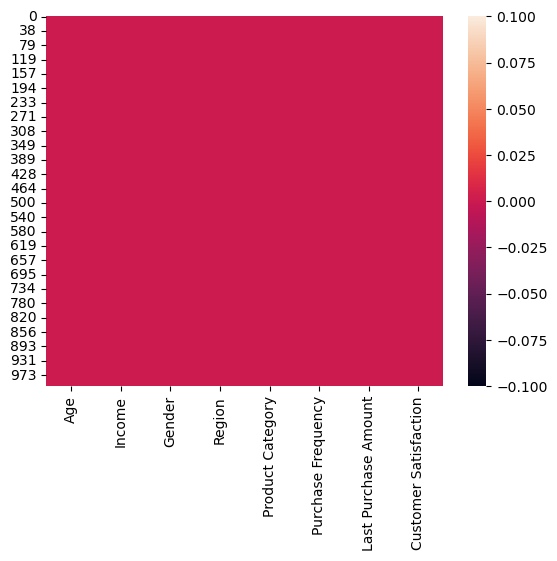

In [14]:
sns.heatmap(df.isnull())

In [19]:
lab = LabelEncoder()

for i in ['Gender', 'Region', 'Product Category']:
    df[i] = lab.fit_transform(df[i])

In [20]:
df

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,62,5326.0,2,3,0,4,96.56,9.2
1,65,7056.0,0,0,1,5,111.83,9.9
2,18,3710.0,0,0,1,5,283.69,9.7
3,21,4102.0,0,1,4,5,30.42,4.3
4,21,7675.0,0,0,0,2,389.73,2.6
...,...,...,...,...,...,...,...,...
995,54,7176.0,0,3,1,2,373.34,4.1
996,19,8208.0,2,2,3,5,302.92,6.3
997,47,7430.0,1,3,1,10,405.82,2.1
998,23,2686.0,0,0,2,9,132.15,7.4


In [21]:
df1 = pd.get_dummies(df)
df1

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,62,5326.0,2,3,0,4,96.56,9.2
1,65,7056.0,0,0,1,5,111.83,9.9
2,18,3710.0,0,0,1,5,283.69,9.7
3,21,4102.0,0,1,4,5,30.42,4.3
4,21,7675.0,0,0,0,2,389.73,2.6
...,...,...,...,...,...,...,...,...
995,54,7176.0,0,3,1,2,373.34,4.1
996,19,8208.0,2,2,3,5,302.92,6.3
997,47,7430.0,1,3,1,10,405.82,2.1
998,23,2686.0,0,0,2,9,132.15,7.4


In [22]:
scaler = StandardScaler()

for i in df1.columns:
    df1[i] = scaler.fit_transform(df1[[i]])

In [23]:
df1

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,1.219893,-0.092822,1.234302,1.295958,-1.451476,-0.921549,-0.614827,1.399271
1,1.418546,0.127133,-1.217990,-1.395418,-0.737220,-0.674745,-0.565637,1.669570
2,-1.693696,-0.298283,-1.217990,-1.395418,-0.737220,-0.674745,-0.012010,1.592342
3,-1.495042,-0.248443,-1.217990,-0.498292,1.405548,-0.674745,-0.827890,-0.492823
4,-1.495042,0.205834,-1.217990,-1.395418,-1.451476,-1.415158,0.329585,-1.149264
...,...,...,...,...,...,...,...,...
995,0.690149,0.142390,-1.217990,1.295958,-0.737220,-1.415158,0.276786,-0.570051
996,-1.627478,0.273601,1.234302,0.398833,0.691292,-0.674745,0.049937,0.279460
997,0.226624,0.174684,0.008156,1.295958,-0.737220,0.559277,0.381417,-1.342335
998,-1.362606,-0.428476,-1.217990,-1.395418,-0.022964,0.312473,-0.500178,0.704216


<Axes: >

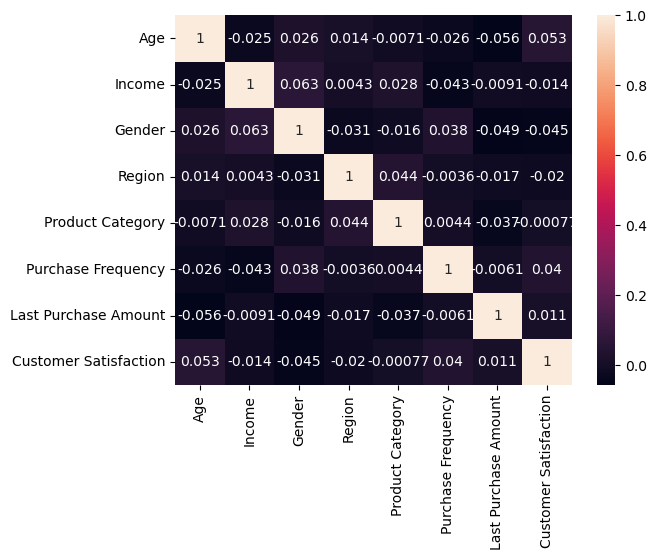

In [24]:
sns.heatmap(df1.corr(), annot=True)

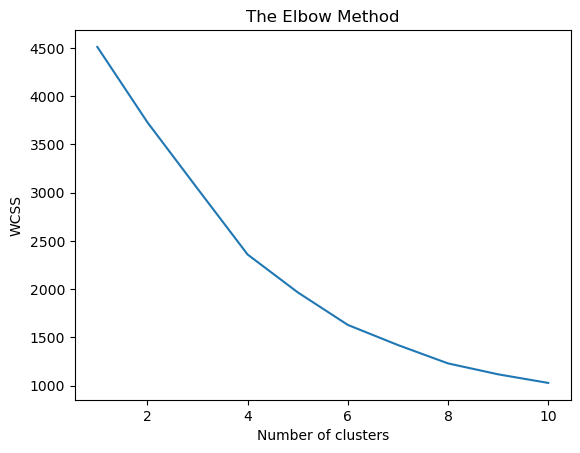

In [36]:
wcss =[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df1.drop(['Gender', 'Region', 'Product Category'],axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
#print the diffrence between cosecutice WCSS and previous
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df1.drop(['Gender', 'Region', 'Product Category'],axis=1))
    print(i,kmeans.inertia_)

1 4510.0
2 3728.9000329140713
3 3041.417067768919
4 2358.6799018955703
5 1966.8410087870038
6 1629.163938675139
7 1420.508657504372
8 1230.3171943845073
9 1117.1665650829664
10 1028.0627526050166


In [49]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
clusters = kmeans.fit_predict(df1.drop(['Gender', 'Region', 'Product Category'],axis=1))

In [50]:
df['Clusters'] = clusters
df

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction,Clusters
0,62,5326.0,2,3,0,4,96.56,9.2,3
1,65,7056.0,0,0,1,5,111.83,9.9,3
2,18,3710.0,0,0,1,5,283.69,9.7,3
3,21,4102.0,0,1,4,5,30.42,4.3,3
4,21,7675.0,0,0,0,2,389.73,2.6,3
...,...,...,...,...,...,...,...,...,...
995,54,7176.0,0,3,1,2,373.34,4.1,3
996,19,8208.0,2,2,3,5,302.92,6.3,3
997,47,7430.0,1,3,1,10,405.82,2.1,0
998,23,2686.0,0,0,2,9,132.15,7.4,0


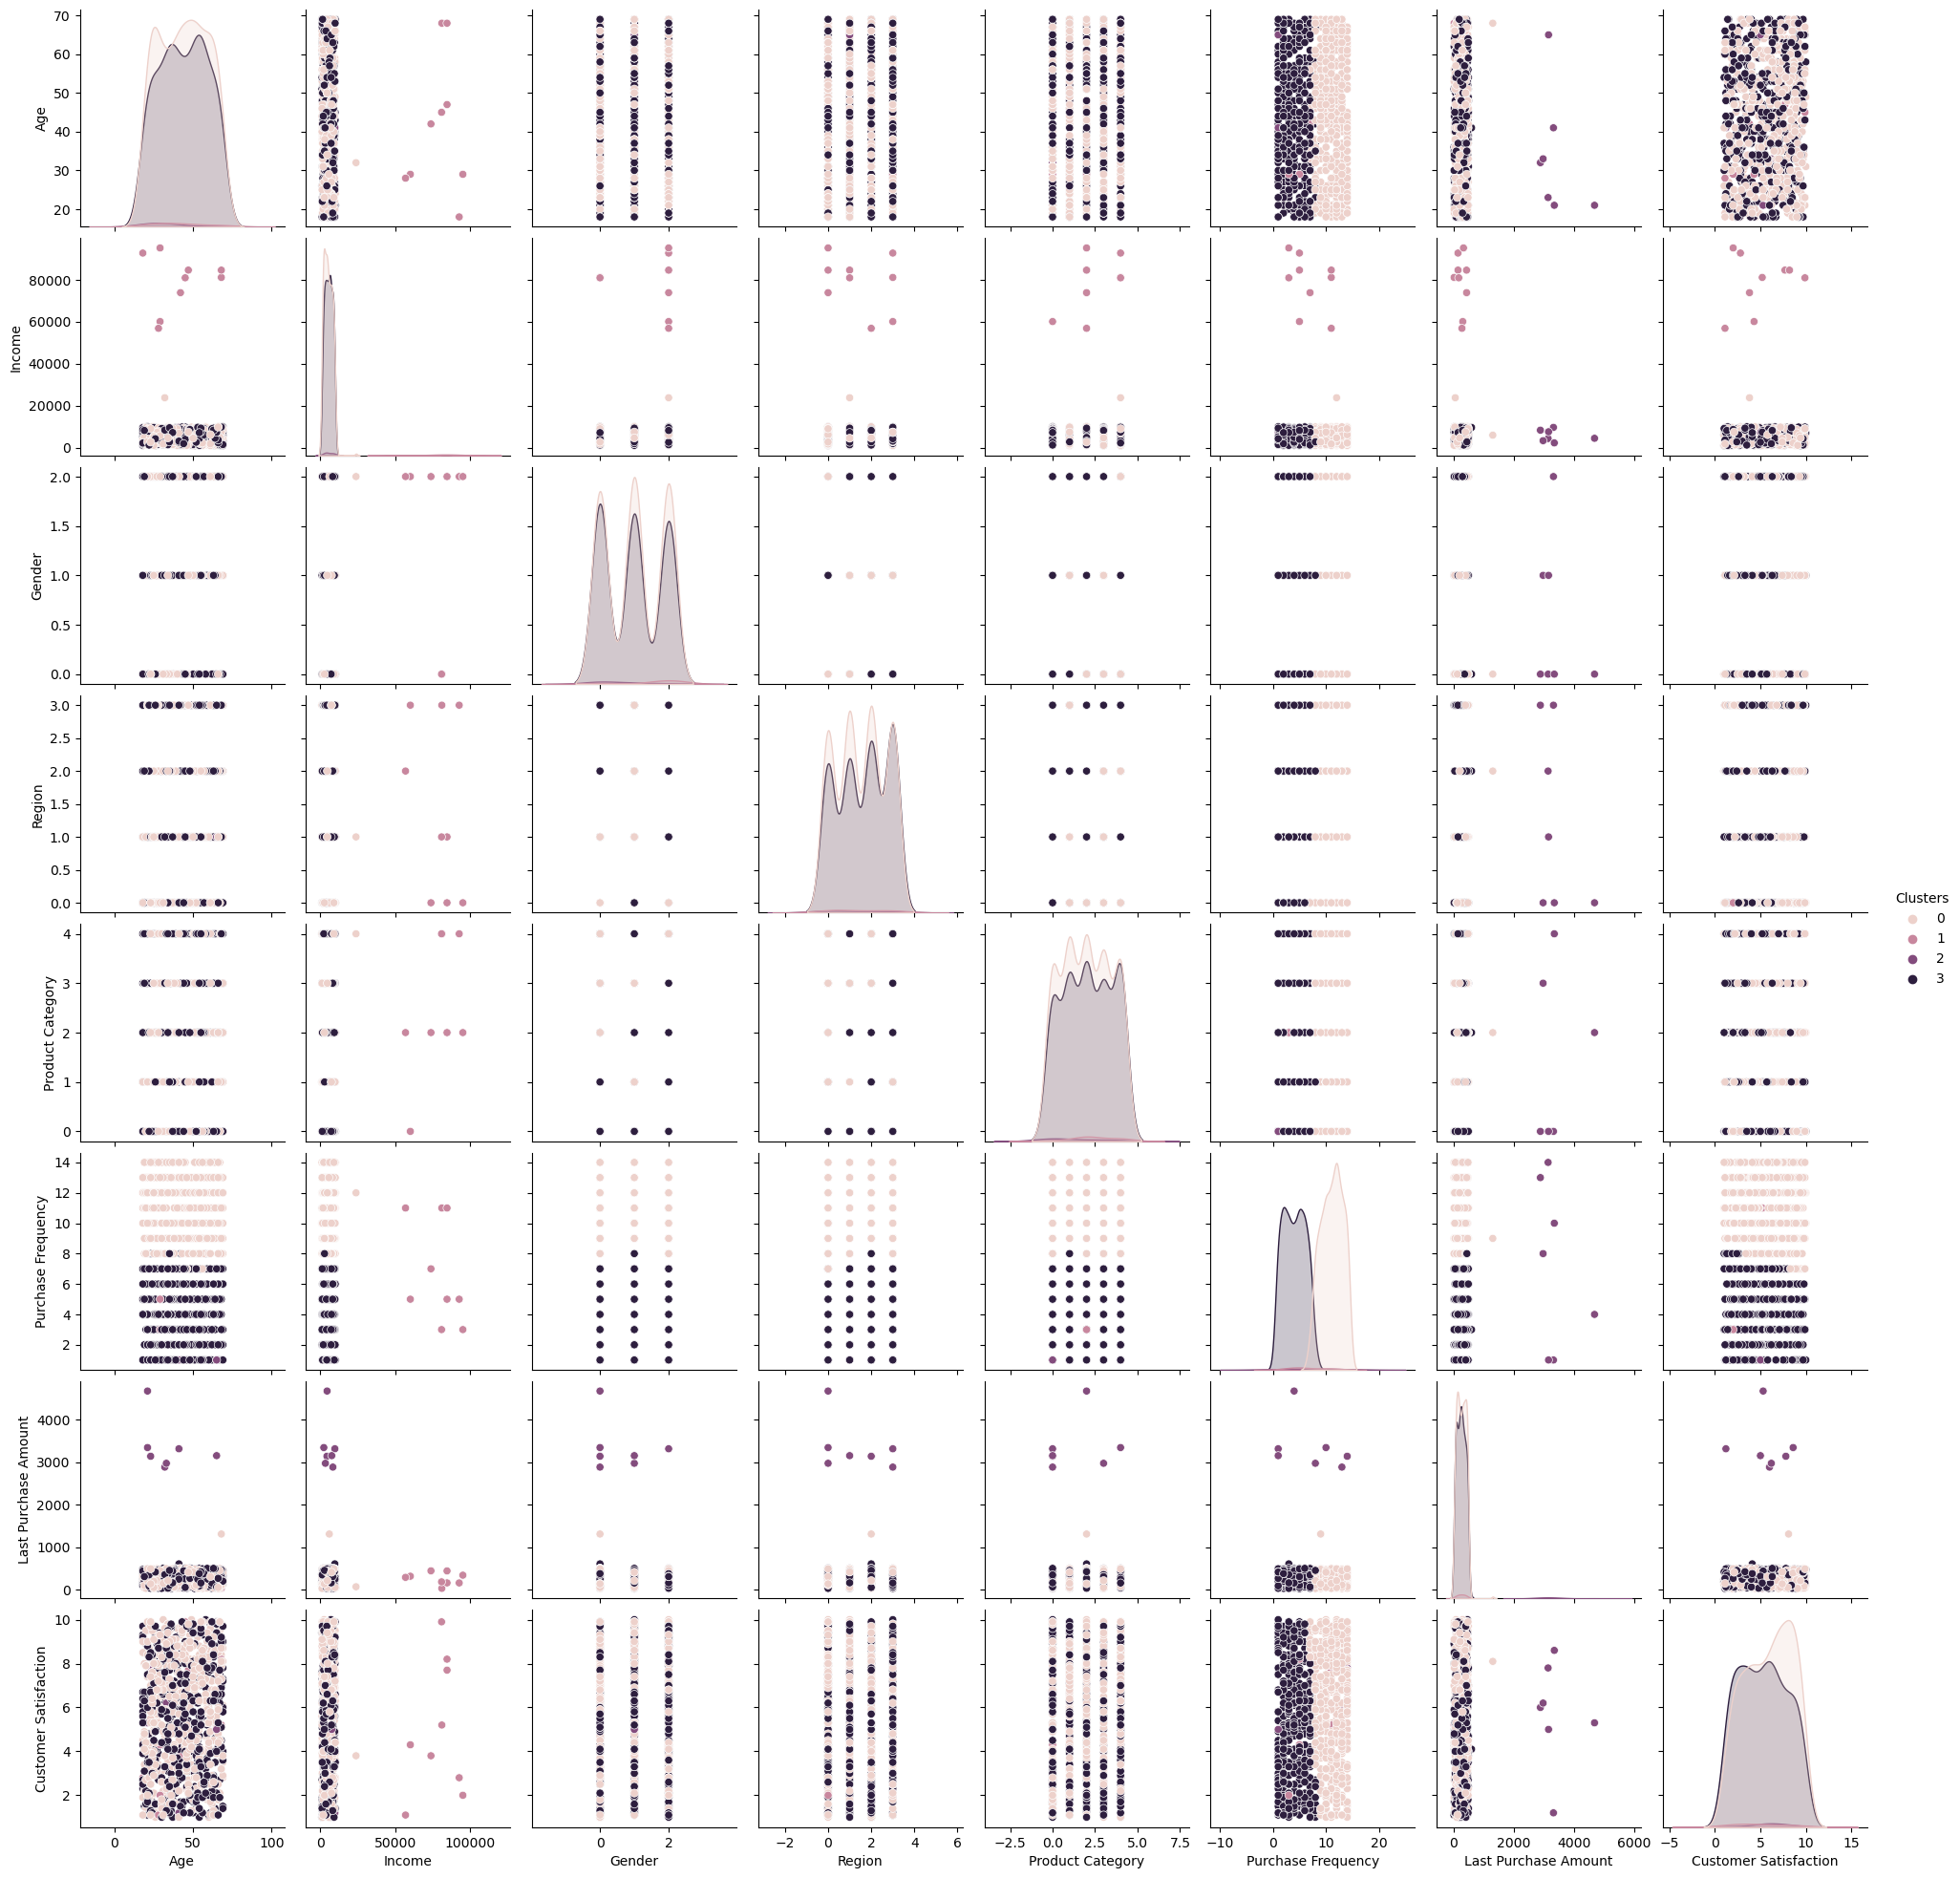

In [51]:
sns.pairplot(df,hue='Clusters')

In [52]:
dt = pd.read_csv('Excel.csv')
dt

,Customer ID,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Purchase Date,Purchase Time,Customer Satisfaction
0,1,62,5326,Other,West,Clothing,4,96.56,14-07-2021 20:50,20:50:40,9.2
1,2,65,7056,Female,East,Electronics,5,111.83,09-10-2021 00:42,00:42:15,9.9
2,3,18,3710,Female,East,Electronics,5,283.69,28-08-2021 11:52,11:52:55,9.7
3,4,21,4102,Female,North,Sports,5,30.42,06-01-2021 10:19,10:19:17,4.3
4,5,21,7675,Female,East,Clothing,2,389.73,04-11-2021 05:15,05:15:54,2.6
...,...,...,...,...,...,...,...,...,...,...,...
897,996,54,7176,Female,West,Electronics,2,373.34,09-12-2021 04:35,04:35:00,4.1
898,997,19,8208,Other,South,Home & Living,5,302.92,07-07-2021 11:15,11:15:44,6.3
899,998,47,7430,Male,West,Electronics,10,405.82,22-05-2021 22:16,22:16:59,2.1
900,999,23,2686,Female,East,Groceries,9,132.15,16-06-2021 14:47,14:47:35,7.4


In [53]:
dt.drop(['Purchase Date','Customer ID', 'Purchase Time'],axis=1,inplace=True)
dt

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,62,5326,Other,West,Clothing,4,96.56,9.2
1,65,7056,Female,East,Electronics,5,111.83,9.9
2,18,3710,Female,East,Electronics,5,283.69,9.7
3,21,4102,Female,North,Sports,5,30.42,4.3
4,21,7675,Female,East,Clothing,2,389.73,2.6
...,...,...,...,...,...,...,...,...
897,54,7176,Female,West,Electronics,2,373.34,4.1
898,19,8208,Other,South,Home & Living,5,302.92,6.3
899,47,7430,Male,West,Electronics,10,405.82,2.1
900,23,2686,Female,East,Groceries,9,132.15,7.4


In [54]:
lab = LabelEncoder()

for i in ['Gender', 'Region', 'Product Category']:
    dt[i] = lab.fit_transform(dt[i])

In [55]:
dt

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,62,5326,2,3,0,4,96.56,9.2
1,65,7056,0,0,1,5,111.83,9.9
2,18,3710,0,0,1,5,283.69,9.7
3,21,4102,0,1,4,5,30.42,4.3
4,21,7675,0,0,0,2,389.73,2.6
...,...,...,...,...,...,...,...,...
897,54,7176,0,3,1,2,373.34,4.1
898,19,8208,2,2,3,5,302.92,6.3
899,47,7430,1,3,1,10,405.82,2.1
900,23,2686,0,0,2,9,132.15,7.4


In [56]:
dt1 = pd.get_dummies(dt)
dt1

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,62,5326,2,3,0,4,96.56,9.2
1,65,7056,0,0,1,5,111.83,9.9
2,18,3710,0,0,1,5,283.69,9.7
3,21,4102,0,1,4,5,30.42,4.3
4,21,7675,0,0,0,2,389.73,2.6
...,...,...,...,...,...,...,...,...
897,54,7176,0,3,1,2,373.34,4.1
898,19,8208,2,2,3,5,302.92,6.3
899,47,7430,1,3,1,10,405.82,2.1
900,23,2686,0,0,2,9,132.15,7.4


In [57]:
scaler = StandardScaler()

for i in dt1.columns:
    dt1[i] = scaler.fit_transform(dt1[[i]])

In [58]:
dt1

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction
0,1.219893,0.000891,1.234302,1.295958,-1.451476,-0.921549,-0.614827,1.399271
1,1.418546,0.677388,-1.217990,-1.395418,-0.737220,-0.674745,-0.565637,1.669570
2,-1.693696,-0.631028,-1.217990,-1.395418,-0.737220,-0.674745,-0.012010,1.592342
3,-1.495042,-0.477740,-1.217990,-0.498292,1.405548,-0.674745,-0.827890,-0.492823
4,-1.495042,0.919441,-1.217990,-1.395418,-1.451476,-1.415158,0.329585,-1.149264
...,...,...,...,...,...,...,...,...
897,0.690149,0.724312,-1.217990,1.295958,-0.737220,-1.415158,0.276786,-0.570051
898,-1.627478,1.127864,1.234302,0.398833,0.691292,-0.674745,0.049937,0.279460
899,0.226624,0.823636,0.008156,1.295958,-0.737220,0.559277,0.381417,-1.342335
900,-1.362606,-1.031451,-1.217990,-1.395418,-0.022964,0.312473,-0.500178,0.704216


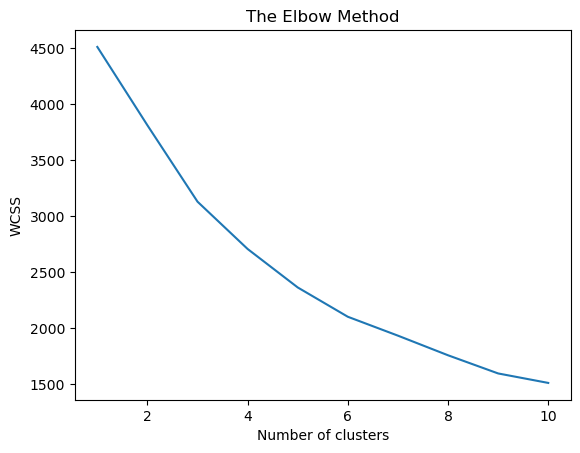

In [59]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(dt1.drop(['Gender', 'Region', 'Product Category'],axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
clusters = kmeans.fit_predict(dt1.drop(['Gender', 'Region', 'Product Category'],axis=1))

In [61]:
dt['clusters'] = clusters
dt

,Age,Income,Gender,Region,Product Category,Purchase Frequency,Last Purchase Amount,Customer Satisfaction,clusters
0,62,5326,2,3,0,4,96.56,9.2,1
1,65,7056,0,0,1,5,111.83,9.9,1
2,18,3710,0,0,1,5,283.69,9.7,1
3,21,4102,0,1,4,5,30.42,4.3,1
4,21,7675,0,0,0,2,389.73,2.6,1
...,...,...,...,...,...,...,...,...,...
897,54,7176,0,3,1,2,373.34,4.1,1
898,19,8208,2,2,3,5,302.92,6.3,1
899,47,7430,1,3,1,10,405.82,2.1,0
900,23,2686,0,0,2,9,132.15,7.4,0


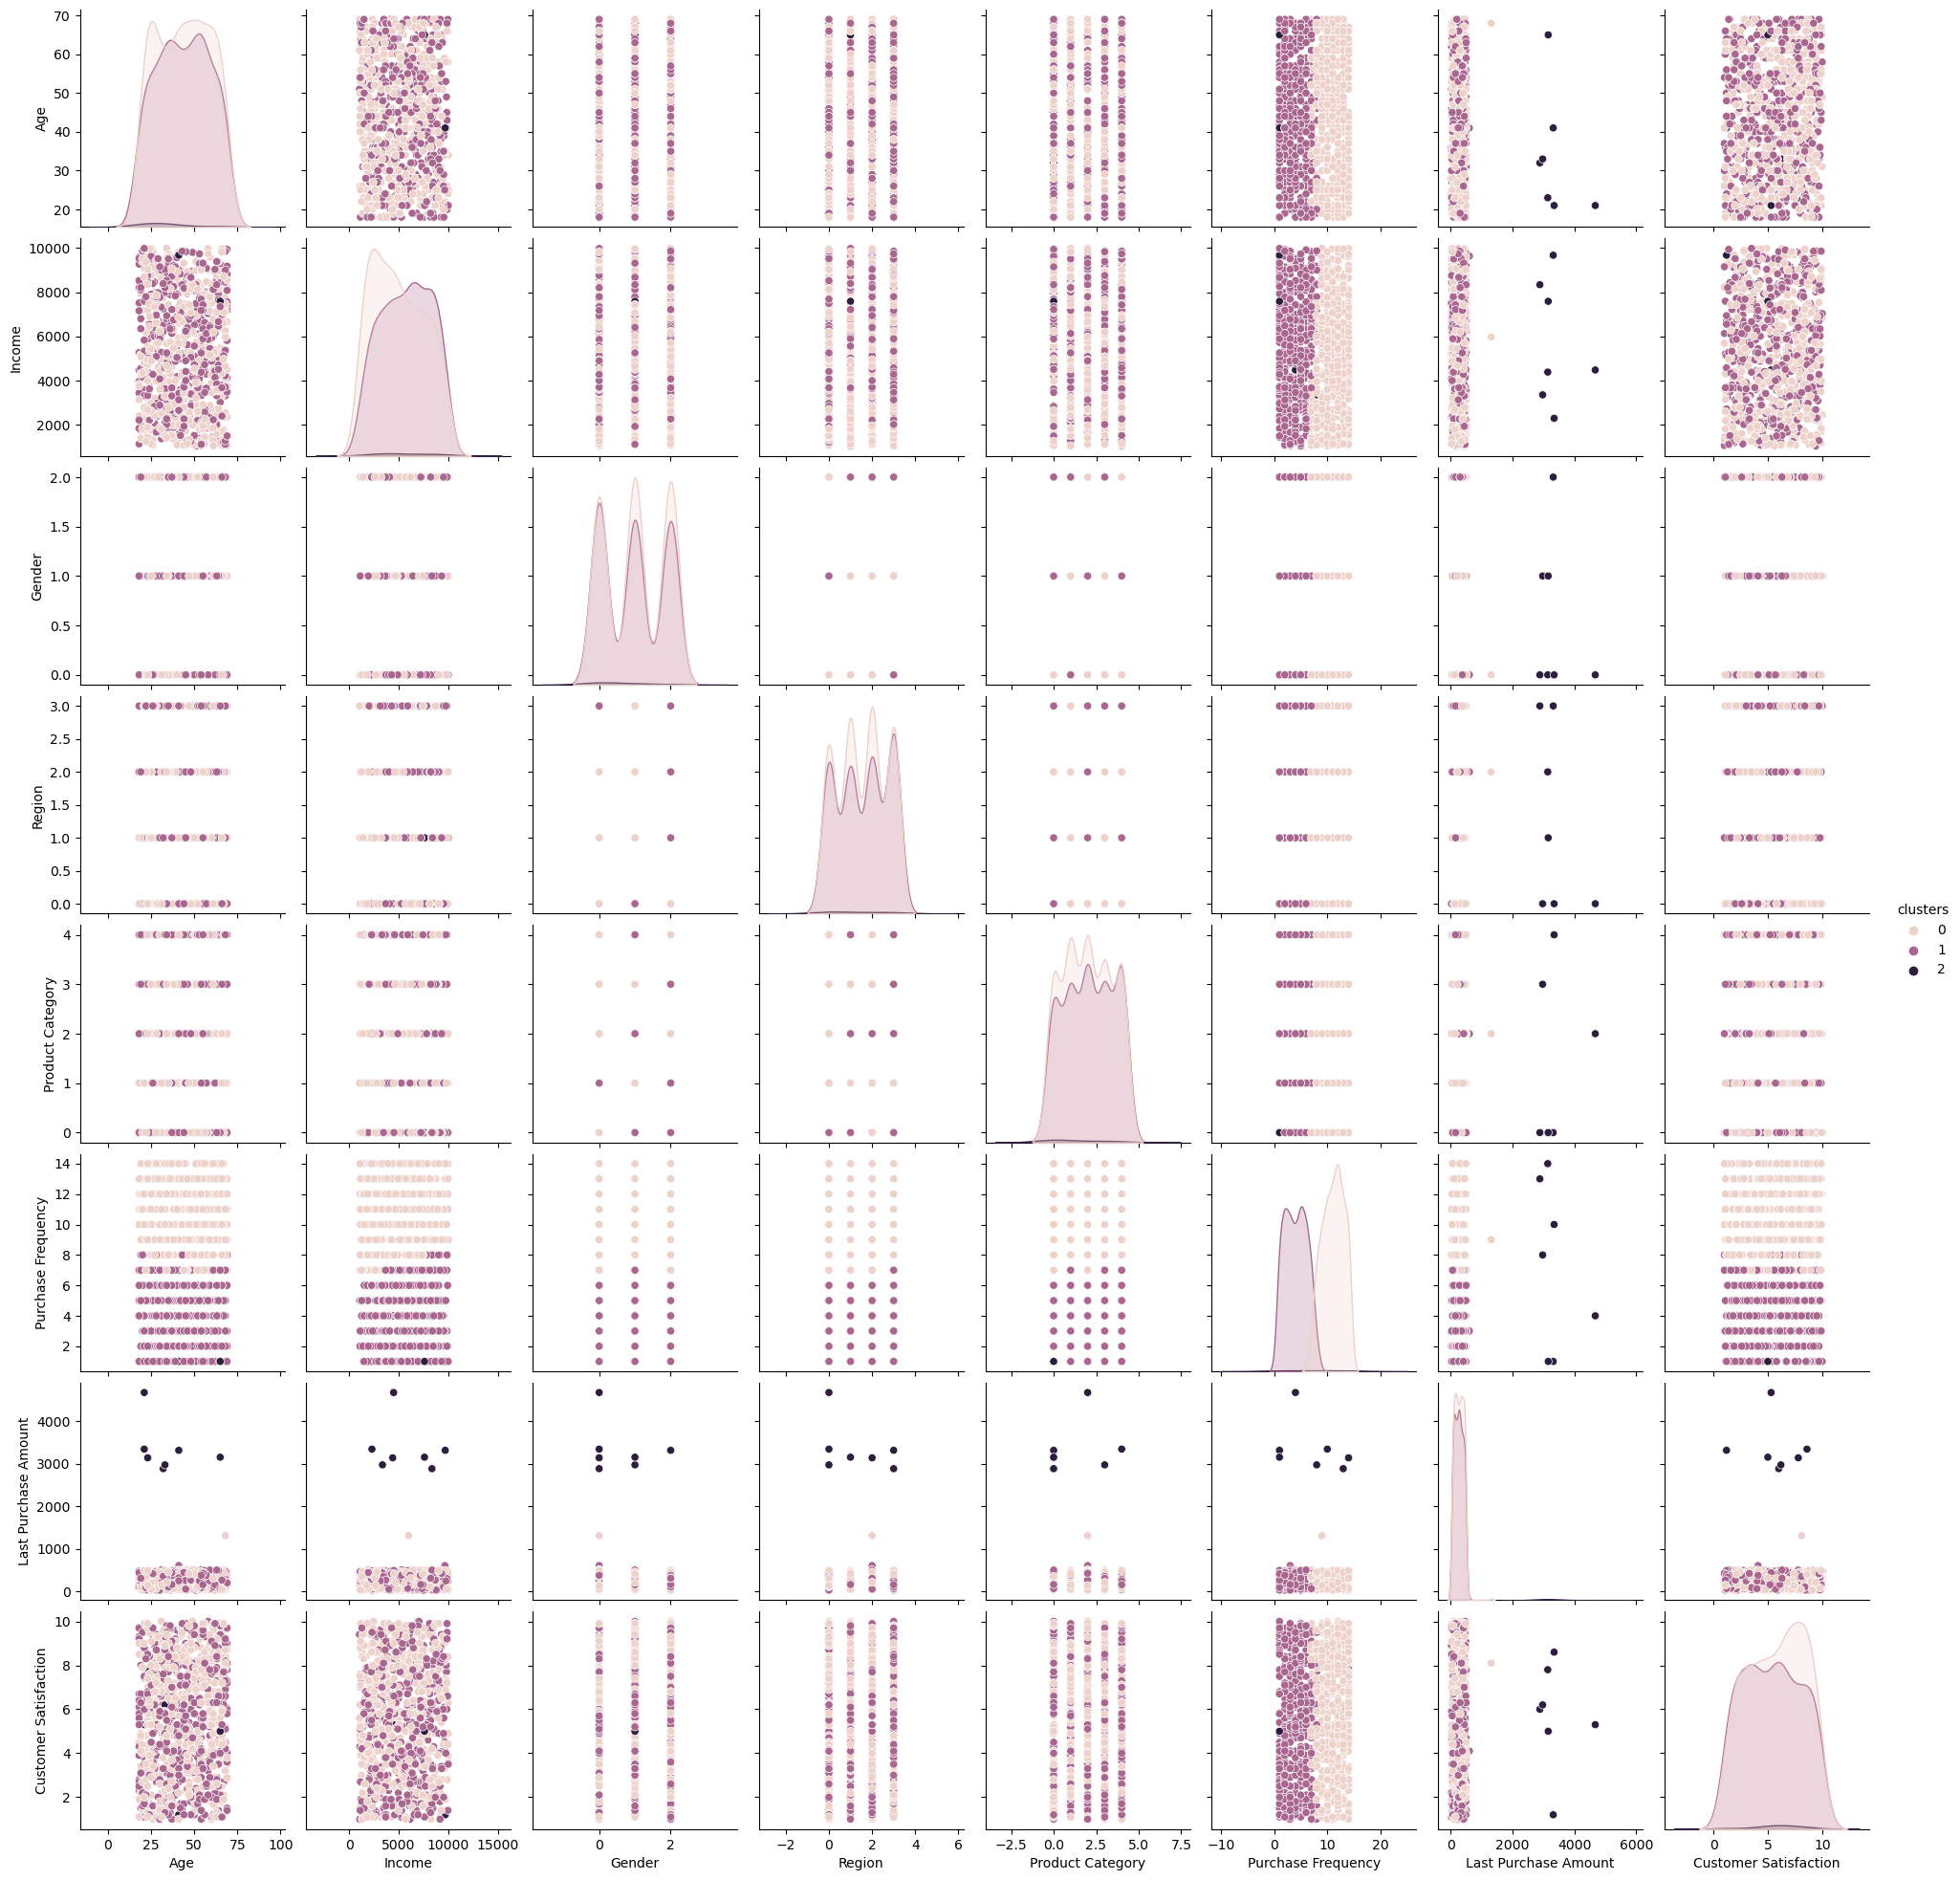

In [62]:
sns.pairplot(dt,hue='clusters')